In [12]:
import numpy
import os
from struct import unpack
import matplotlib.pyplot

In [13]:
def loadMtbFileStructure(fileName):
    f = open(fileName, "rb")
    try:
        fileNameLenghtBytes = f.read(4)  
        fileNameLenghtNode = unpack('i', fileNameLenghtBytes)
        fileNameLenght = sum(fileNameLenghtNode)
        fileName = loadFileNameStructure(f.read(fileNameLenght).decode("utf-8"))

        dateLenghtBytes = f.read(4)
        dateLenghtNode = unpack('i', dateLenghtBytes)
        dateLenght = sum(dateLenghtNode)
        date = f.read(dateLenght).decode("utf-8")
        
        notesLenghtBytes = f.read(4)
        notesLenghtNode = unpack('i', notesLenghtBytes)
        notesLenght = sum(notesLenghtNode)
        notes = f.read(notesLenght).decode("utf-8")
        f.read(16)
        
        dataPacketsLenghtBytes = f.read(4)
        dataPacketsLenghtNode = unpack('i', dataPacketsLenghtBytes)
        dataPacketsLenght = sum(dataPacketsLenghtNode)
        dataPackets = []
        for i in range(0, dataPacketsLenght):
            dataPacket = loadDataPacketStructure(f.read(24))
            dataPackets.append(dataPacket)
    finally:
        f.close()
    mtbFile = Mtb(fileName, date, notes, dataPackets)
    return mtbFile

def loadDataPacketStructure(dataPacketBytes):
    momentPomiaru = sum(unpack('i', dataPacketBytes[0:4]))
    polozenieX = sum(unpack('i', dataPacketBytes[4:8]))
    polozenieY = sum(unpack('i', dataPacketBytes[8:12]))
    nacisk = sum(unpack('i', dataPacketBytes[12:16]))
    szerokoscKatowa = sum(unpack('i', dataPacketBytes[16:20]))
    wysokoscKatowa = sum(unpack('i', dataPacketBytes[20:24]))
    return PakietDanych(momentPomiaru, polozenieX, polozenieY, nacisk, szerokoscKatowa, wysokoscKatowa)
    

def loadFileNameStructure(fileNameString):
    lp = fileNameString[:fileNameString.find('_', 0)]
    tmp = fileNameString.find('_', len(lp)+1)
    idPacjenta = fileNameString[len(lp)+1:tmp]
    nrOperacji = fileNameString[tmp+1]
    badanie = fileNameString[tmp+2]
    plec = fileNameString[tmp+3]
    reka = fileNameString[tmp+4]
    polkula = fileNameString[tmp+5]
    zabieg = fileNameString[tmp+6]
    return NazwaPliku(lp, idPacjenta, nrOperacji, badanie, plec, reka, polkula, zabieg)

In [14]:
class PakietDanych(object):
    momentPomiaru = ''
    polozenieX = ''
    polozenieY = ''
    nacisk = ''
    szerokoscKatowa = ''
    wysokoscKatowa = ''
    
    def __init__(self, momentPomiaru, polozenieX, polozenieY, nacisk, szerokoscKatowa, wysokoscKatowa):
        self.momentPomiaru = momentPomiaru
        self.polozenieX = polozenieX
        self.polozenieY = polozenieY
        self.nacisk = nacisk
        self.szerokoscKatowa = szerokoscKatowa
        self.wysokoscKatowa = wysokoscKatowa

        
class NazwaPliku(object):
    lp = -1
    idPacjenta = -1
    nrOperacji = -1
    badanie = -1
    plec = ''
    reka = ''
    polkula = ''
    zabieg = ''
    
    def __init__(self, lp, idPacjenta, nrOperacji, badanie, plec, reka, polkula, zabieg):
        self.lp = lp
        self.idPacjenta = idPacjenta
        self.nrOperacji = nrOperacji
        self.badanie = badanie
        self.plec = plec
        self.reka = reka
        self.polkula = polkula
        self.zabieg = zabieg

        
class Mtb(object):
    nazwaPliku = object
    data = ''
    notatki = ''
    pakietyDanych = []    
    def __init__(self, nazwaPliku, data, notatki, pakietyDanych):
        self.nazwaPliku = nazwaPliku
        self.data = data
        self.notatki = notatki
        self.pakietyDanych = pakietyDanych

In [15]:
def getAllMtbFilesFrom(folderName):
    mtbFiles = []
    for name in os.listdir(folderName):
        if name.endswith('.mtb'):
            mtbFile = loadMtbFileStructure(folderName + '/' + name)
            mtbFiles.append(mtbFile)
        elif os.path.isdir(folderName + '/' + name):
            mtbFiles += getAllMtbFilesFrom(folderName + '/' + name)
    return mtbFiles

In [16]:
mtbFiles = getAllMtbFilesFrom('./dane/')
print(mtbFiles)

[<__main__.Mtb object at 0x10eb00fd0>, <__main__.Mtb object at 0x10f1a2390>, <__main__.Mtb object at 0x10f5455f8>, <__main__.Mtb object at 0x1103856d8>, <__main__.Mtb object at 0x1111c5390>, <__main__.Mtb object at 0x11266c278>, <__main__.Mtb object at 0x113e1d630>, <__main__.Mtb object at 0x1146075f8>, <__main__.Mtb object at 0x1149c9ef0>, <__main__.Mtb object at 0x115498198>, <__main__.Mtb object at 0x1162325c0>, <__main__.Mtb object at 0x116960860>, <__main__.Mtb object at 0x117373278>, <__main__.Mtb object at 0x1178d6eb8>, <__main__.Mtb object at 0x117e4af28>, <__main__.Mtb object at 0x1181651d0>]


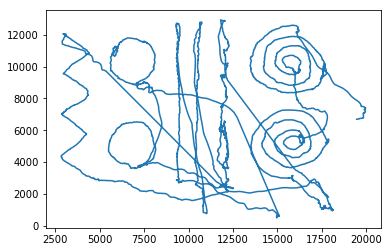

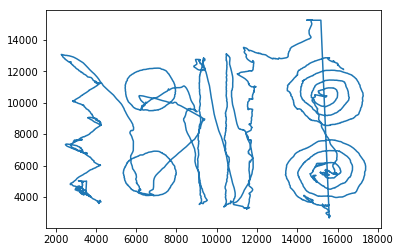

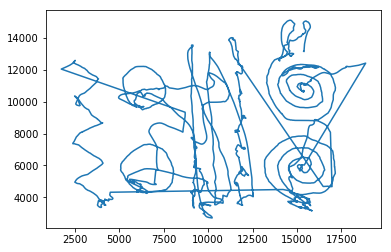

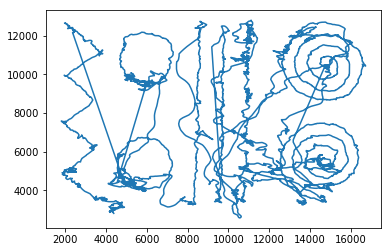

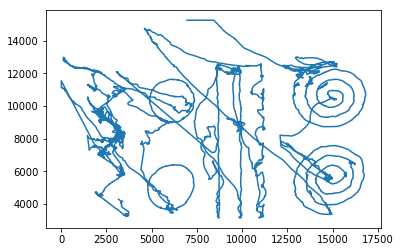

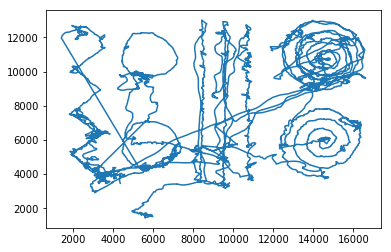

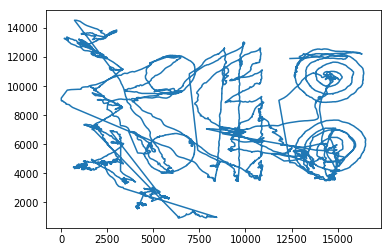

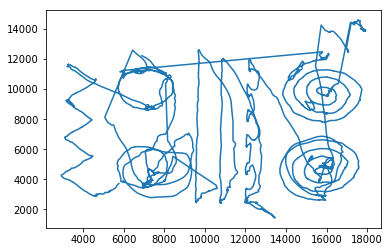

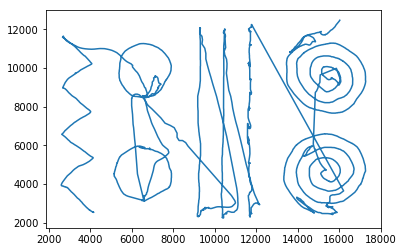

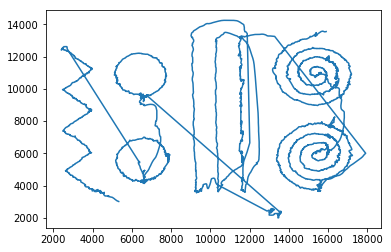

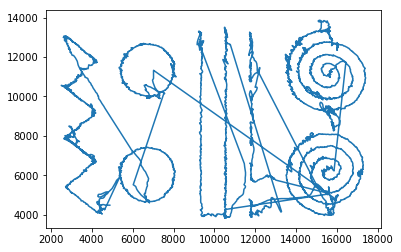

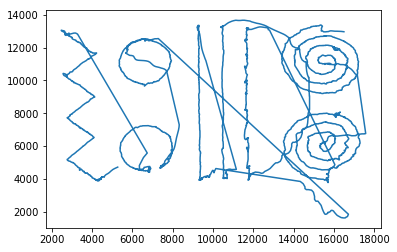

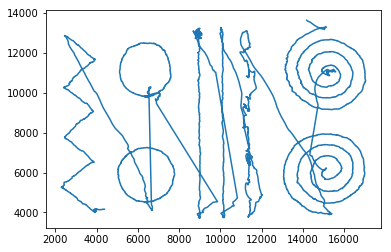

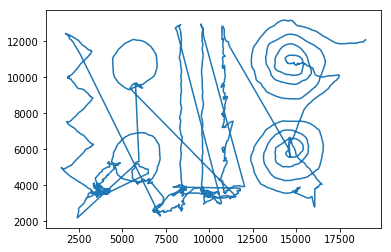

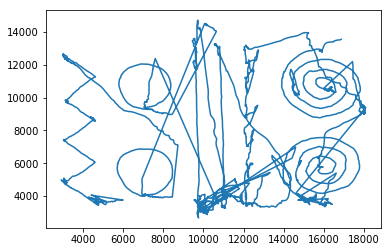

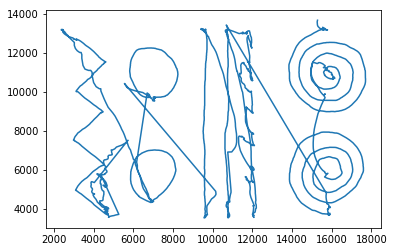

In [17]:
polozeniaX = []
polozeniaY = []
for i in range(0, len(mtbFiles)):
    polozeniaX.append([])
    polozeniaY.append([])
    for j in range(0, len(mtbFiles[i].pakietyDanych)):
        polozeniaX[i].append(mtbFiles[i].pakietyDanych[j].polozenieX)
        polozeniaY[i].append(mtbFiles[i].pakietyDanych[j].polozenieY)
    matplotlib.pyplot.plot(polozeniaX[i], polozeniaY[i])
    matplotlib.pyplot.show()